# Fatima Fellowship Coding Challenge (Pick 1)

Thank you for applying to the Fatima Fellowship. To help us select the Fellows and assess your ability to do machine learning research, we are asking that you complete a short coding challenge. Please pick **1 of these 5** coding challenges, whichever is most aligned with your interests. These coding challenges are not meant to take too long, do NOT spend more than 4-6 hours on them -- you can submit whatever you have.

**How to submit**: Please make a copy of this colab notebook, add your code and results, and submit your colab notebook along with your application. If you have never used a colab notebook, [check out this video](https://www.youtube.com/watch?v=i-HnvsehuSw)



---


### **Important**: Beore you get started, please make sure to make a **copy of this notebook** and set sharing permissions so that **anyone with the link can view**. Otherwise, we will NOT be able to assess your application.



---



# 1. Deep Learning for Vision

**Generated by AI detector**: Train a model to detect if images are generated by AI

* Find a dataset of natural images and images generated by AI (here is one such dataset on the [Hugging Face Hub](https://huggingface.co/datasets/competitions/aiornot) but you're welcome to use any dataset you've found.
* Create a training and test set.
* Build a neural network (using Tensorflow, PyTorch, or any framework you like)
* Train it to classify the image as being generated by an AI or not until a reasonable accuracy is reached
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* Look at some of the images that were classified incorrectly. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

**Submission instructions**: Please write your code below and include some examples of images that were classified

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified images. Please explain what you might do to improve your model's performance on these images in the future (you do not need to impelement these suggestions)

[Please put your write up here]

# 2. Deep Learning for NLP

**Fake news classifier**: Train a text classification model to detect fake news articles!

* Download the dataset here: https://www.kaggle.com/datasets/sadikaljarif/fake-news-detection-dataset-english (if you'd like, you can also look at fake news datasets in other languages, which are available on the Huggingface Hub)
* Develop an NLP model for classification that uses a pretrained language model and the *text* of the article. It should *NOT* use the URL
* Finetune your model on the dataset, and generate an AUC curve of your model on the test set of your choice. 
* [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.
* *Answer the following question*: Look at some of the news articles that were classified incorrectly. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

In [70]:
! pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [27]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D,Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.python.ops.numpy_ops import np_utils
from transformers import BertModel, TFBertModel 
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from transformers import BertTokenizer, TFBertModel
from tensorflow.keras import regularizers
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [4]:
import pandas as pd
from matplotlib import rcParams
import seaborn as sns
import numpy as np
from PIL import Image
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from transformers import AutoTokenizer
import warnings
warnings.filterwarnings("ignore")

In [6]:
data_real = pd.read_csv("/True.csv")
data_fake = pd.read_csv("/Fake.csv")

In [7]:
data_real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [8]:
data_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [9]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [10]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


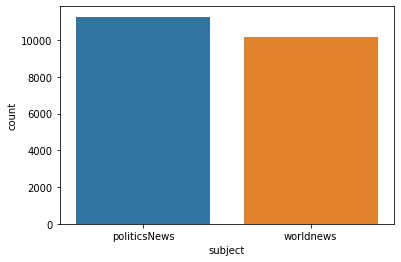

In [11]:
sns.countplot(x="subject",data=data_real);
plt.rcParams["figure.figsize"] = (8, 8)

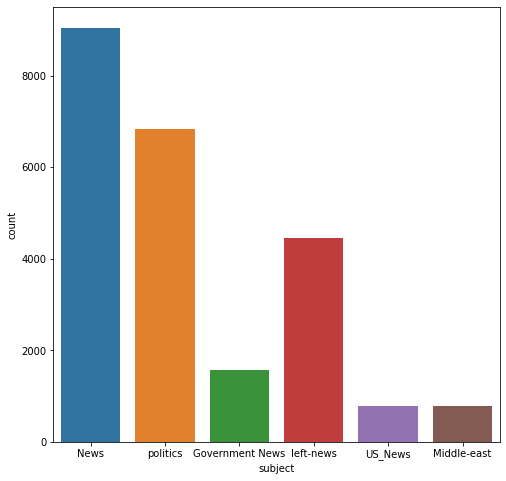

In [12]:
sns.countplot(x="subject",data=data_fake);
plt.rcParams["figure.figsize"] = (8, 8)

In [13]:
data_real["label"] = "Real"
data_fake["label"] = "Fake"

In [14]:
Data = pd.concat([data_fake,data_real])

In [15]:
Data = Data.sample(frac = 1).reset_index(drop = True)

In [16]:
Data.head(15)

,title,text,subject,date,label
0,The Washington Post NAILS Hannity For Lying A...,Sean Hannity told a massive lie to make Donald...,News,"August 11, 2016",Fake
1,Bolstered Libyan coast guard intercepts packed...,TRIPOLI (Reuters) - Libya s European-backed co...,worldnews,"November 4, 2017",Real
2,Trump to pitch 'America First' agenda in U.N. ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 14, 2017",Real
3,White House says Trump to sign broadband priva...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 29, 2017",Real
4,Republican Cruz criticizes Trump for comments ...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"March 22, 2016",Real
5,MOTHER OF SON KILLED IN AFGHANISTAN To Anti-Am...,When multi-millionaire San Francisco 49ers qua...,politics,"Aug 29, 2016",Fake
6,Missouri lawmaker criticized after wishing for...,(Reuters) - A Democratic Missouri state senato...,politicsNews,"August 17, 2017",Real
7,"Shoot-out between Colombia rebels kills 13, go...","BOGOTA (Reuters) - Thirteen people, including ...",worldnews,"December 5, 2017",Real
8,Turkish banker makes second bid for mistrial i...,NEW YORK (Reuters) - Lawyers for an executive ...,worldnews,"December 20, 2017",Real
9,DISGUSTING! Hillary Voters Taunt And Abuse Ame...,"Crazy mob vandalizes, threatens, and spits at ...",politics,"Apr 30, 2016",Fake


In [17]:
Data.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

In [18]:
Data["label"].value_counts()

Fake    23481
Real    21417
Name: label, dtype: int64

In [19]:
Data["label"] = Data["label"].map({"Real":1,"Fake":0})

In [20]:
Data.head()

,title,text,subject,date,label
0,The Washington Post NAILS Hannity For Lying A...,Sean Hannity told a massive lie to make Donald...,News,"August 11, 2016",0
1,Bolstered Libyan coast guard intercepts packed...,TRIPOLI (Reuters) - Libya s European-backed co...,worldnews,"November 4, 2017",1
2,Trump to pitch 'America First' agenda in U.N. ...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"September 14, 2017",1
3,White House says Trump to sign broadband priva...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 29, 2017",1
4,Republican Cruz criticizes Trump for comments ...,WASHINGTON (Reuters) - U.S. Republican preside...,politicsNews,"March 22, 2016",1


In [21]:
Data.label[9947]


0

In [22]:
Data.text[9947]

'A day after the terrorist attacks in Brussels, Belgium, Hillary Clinton gave a speech on counterterrorism at Stanford University in California.The speech was billed by the campaign as an opportunity to highlight  how now is a time for steady leadership when we must stand in solidarity with our European allies and respond firmly to defeat ISIS.  Both Democrats and Republicans have pointed out that by contrast to Clinton   former Senator, former Secretary of State   Donald Trump s foreign policy ideas have been haphazard, contradictory, and overall would endanger the country.On ISIS and the Belgium attacks, Clinton directly rejected Trump s kneejerk response that America needs to build his  beautiful  wall because,  Walls will not protect us from this threat. We cannot contain ISIS   we must defeat ISIS. Clinton took direct aim at Trump s recent reckless claim that America should pull away from NATO and our allies, pointing out that while Vladimir Putin  already hopes to divide Europe, 

In [23]:
Data["text"]=Data["title"]+Data["text"]

In [24]:
Data.text[36709]

'Islamic state claims suicide bombing near Kabul mosque: AmaqCAIRO (Reuters) - Islamic State claimed responsibility for a suicide bombing near a large Shi ite mosque in the Afghan capital Kabul that killed at least one person on Friday, the group s Amaq news agency said. The blast hit the Qala-e Fatehullah area of the city, near the Hussainya mosque, and came with security forces on alert for possible attacks during Ashura, the holiest celebration in the Shi ite religious calendar. '

In [25]:
max_len=100
data_text=Data["text"]
data_label=Data["label"]

In [35]:
bert_tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

In [36]:
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [29]:
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(data_text, data_label, stratify = data_label, test_size = 0.2, random_state =42)

In [37]:
def tokenize(X):
    
    X = bert_tokenizer(
        text = list(X),
        add_special_tokens = True,
        max_length = 100,
        truncation = True,
        padding = 'max_length',
        return_tensors = 'tf',
        return_token_type_ids = False,
        return_attention_mask = True,
        verbose = True
        )
    return X

In [38]:
X_train_token = tokenize(X_train)
X_test_token = tokenize(X_test)

In [39]:
def create_model():
    dropout_rate=0.2
    input_ids=Input(shape=(maxlen,),dtype=tf.int32)
    input_mask=Input(shape=(maxlen,),dtype=tf.int32)
    bert_layer=bert_model([input_ids,input_mask])[1]
    x=Dropout(0.5)(bert_layer)
    x=Dense(64,activation="tanh")(x)
    x=Dropout(0.2)(x)
    x=Dense(1,activation="sigmoid")(x)
    model = Model(inputs=[input_ids, input_mask], outputs=x)
    return model

In [40]:
maxlen=100
model=create_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 100)]        0           []                               
                                                                                                  
 tf_bert_model (TFBertModel)    TFBaseModelOutputWi  109482240   ['input_3[0][0]',                
                                thPoolingAndCrossAt               'input_4[0][0]']                
                                tentions(last_hidde                                               
                                n_state=(None, 100,                                           

In [41]:
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=1e-05, epsilon=1e-08, decay=0.01,clipnorm=1.0)
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = 'accuracy')

In [55]:
y_pred = np.where(model.predict({ 'input_3' : X_test_token['input_ids'] , 'input_4' : X_test_token['attention_mask']}) >=0.5,1,0)

281/281 [==============================] - 3081s 11s/step


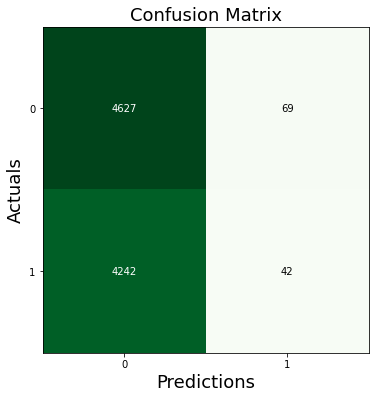

In [56]:
from mlxtend.plotting import plot_confusion_matrix
conf_matrix = confusion_matrix(Y_test,y_pred)
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [57]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.52      0.99      0.68      4696
           1       0.38      0.01      0.02      4284

    accuracy                           0.52      8980
   macro avg       0.45      0.50      0.35      8980
weighted avg       0.45      0.52      0.37      8980



In [58]:
test_text="Cop Shares Racist Meme About Michelle Obama; Now That Cop Is Having A VERY Bad Day (IMAGES)After the election of Donald Trump many folks seem to see it as a permission slip to be as racist and vile as possible. However, here s the thing, you re still going to get called out as racist and vile. And one Alabama police officer just found this out the hard way.According to the Washington Post: Talladega Police Officer Joel Husk was terminated Wednesday for violating the department s social media and code of conduct policies, City Manager Patrick Bryant said. What did he do? So glad you asked: Husk had posted several memes on his Facebook page, including one showing Obama and Melania Trump.  Fluent in Slovenian, English, French, Serbian, and German,  it said over Trump s photo. Over Obama s, it read:  Fluent in Ghetto. Not only that, he posted several extraordinarily racist memes:via Washington Postvia Washington PostAccording to the City Manager, the statements were  deemed to be biased or racially insensitive or derogatory  and because of that, they  have to take action to correct it. If you re going to be a police officer and serve all the public, you can t assume black people standing up for their rights are equivalent to the KKK. That s about the most horrific equivalence imaginable.Also, according to WaPo: Husk, 37, who had been with the department for about two and a half years, had also shared a meme showing President Obama with the words:  Was Dallas a terrorist attack? Yes! Carried out by Obama s own homegrown terrorist group! Which is a blatant lie and anyone who were to feel that way belongs nowhere near law enforcement. The city took the proper action letting this racist cop go, and hopefully it will be an example to police departments all over the country that this sort of behavior simply cannot be tolerated."

In [59]:
test_token = tokenize(test_text)

In [61]:
test_text_pred = np.where(model.predict({ 'input_3' : test_token['input_ids'] , 'input_4' : test_token['attention_mask']}) >=0.5,1,0)

58/58 [==============================] - 642s 11s/step


In [62]:
if(test_text_pred[0]==0):
    print("News is Fake")
else:
    print("News is Real")

News is Fake


**Write up**: 
* Link to the model on Hugging Face Hub: 
* Include some examples of misclassified news articles. Please explain what you might do to improve your model's performance on these news articles in the future (you do not need to impelement these suggestions)

[Please put your write up here]

# 3. Deep RL / Robotics

**RL for Classical Control:** Using any of the [classical control](https://github.com/openai/gym/blob/master/docs/environments.md#classic-control) environments from OpenAI's `gym`, implement a deep NN that learns an optimal policy which maximizes the reward of the environment.

* Describe the NN you implemented and the behavior you observe from the agent as the model converges (or diverges).
* Plot the reward as a function of steps (or Epochs).
Compare your results to a random agent.
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.
* (Optional) [Upload the the model to the Hugging Face Hub](https://huggingface.co/docs/hub/adding-a-model), and add a link to your model below.


You may use any frameworks you like, but you must implement your NN on your own (no pre-defined/trained models like [`stable_baselines`](https://stable-baselines.readthedocs.io/en/master/)).

You may use any simulator other than `gym` _however_:
* The environment has to be similar to the classical control environments (or more complex like [`robosuite`](https://github.com/ARISE-Initiative/robosuite)).
* You cannot choose a game/Atari/text based environment. The purpose of this challenge is to demonstrate an understanding of basic kinematic/dynamic systems.

In [ ]:
### WRITE YOUR CODE TO TRAIN THE MODEL HERE

**Write up**: 
* (Optional) link to the model on Hugging Face Hub: 
* Discuss whether you think your model has learned the optimal policy and potential methods for improving it and/or where it might fail.

[Please put your write up here]

# 4. Theory / Linear Algebra 

**Implement Contrastive PCA** Read [this paper](https://www.nature.com/articles/s41467-018-04608-8) and implement contrastive PCA in Python.

* First, please discuss what kind of dataset this would make sense to use this method on
* Implement the method in Python (do not use previous implementations of the method if they already exist)
* Then create a synthetic dataset and apply the method to the synthetic data. Compare with standard PCA.


**Write up**: Discuss what kind of dataset it would make sense to use Contrastive PCA

[Please put your write up here]

In [ ]:
### WRITE YOUR CODE HERE

# 5. Systems

**Inference on the edge**: Measure the inference times in various computationally-constrained settings

* Pick a few different speech detection models (we suggest looking at models  on the [Hugging Face Hub](https://huggingface.co/models?pipeline_tag=automatic-speech-recognition&sort=downloads))
* Simulate different memory constraints and CPU allocations that are realistic for edge devices that might run such models, such as smart speakers or microcontrollers, and measure what is the average inference time of the models under these conditions 
* How does the inference time vary with (1) choice of model (2) available system memory (3) available CPU (4) size of input?

Are there any surprising discoveries? (Note that this coding challenge is fairly open-ended, so we will be considering the amount of effort invested in discovering something interesting here).

In [ ]:
### WRITE YOUR CODE HERE

**Write up**: What surprising discoveries do you see?

[Please put your write up here]